<h1>Michael Ly's HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\thesp\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\Users\thesp\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\thesp\.julia\environments\v1.8\Manifest.toml`

In [2]:
import SpecialFunctions
import Plots

In [3]:
function sample_gaussian(μ, σ, n)
    quantile = ones(n)
    for i in 1:n
        p = rand()
        quantile[i] = μ + σ * sqrt(2) * SpecialFunctions.erfinv(2 * p - 1)
    end
    return quantile
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [4]:
# 1.
sample = sample_gaussian(-1, 2, 10000)

10000-element Vector{Float64}:
 -0.24532871761461605
  0.5554834635778025
 -3.8031061374507886
 -0.8568541867220097
 -2.878150369411766
 -2.4415792112140515
 -0.08883776894965967
 -3.026910049525151
 -2.5096635456983583
  0.6412985240107261
  ⋮
  1.9731948015155951
 -1.9060706359299866
 -5.782323195432485
  0.7384625079959912
  2.0607951315588884
 -2.0430094352537873
  0.14601795795353478
  2.3428431179061358
  0.9098064029262993

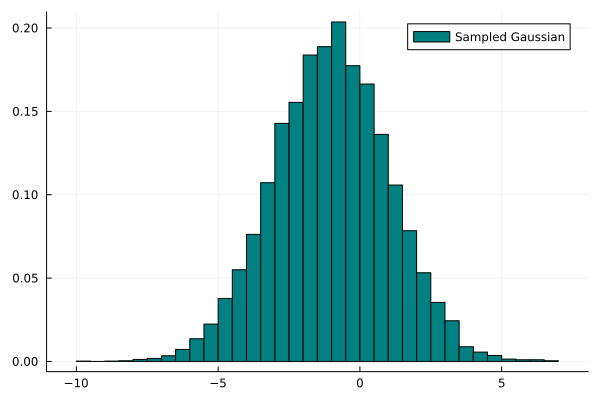

In [5]:
# 2.
using Plots
histogram(sample, color="teal",label = "Sampled Gaussian", normalize = true)

In [9]:
# 3.
x = -8:0.001:6
using Distributions
gausspdf = pdf.(Normal(-1, 2),x)

14001-element Vector{Float64}:
 0.0004363413475228801
 0.00043710555878045894
 0.00043787099901516186
 0.00043863766999606706
 0.0004394055734944224
 0.0004401747112836551
 0.00044094508513936836
 0.0004417166968393453
 0.0004424895481635528
 0.0004432636408941397
 ⋮
 0.0004424895481635528
 0.0004417166968393453
 0.00044094508513936836
 0.0004401747112836551
 0.0004394055734944224
 0.00043863766999606706
 0.00043787099901516186
 0.00043710555878045894
 0.0004363413475228801

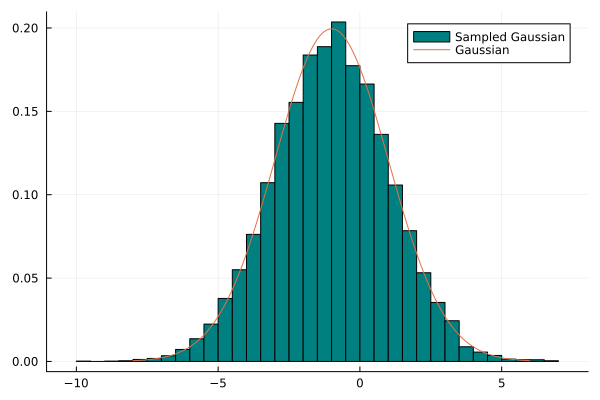

In [10]:
# 4.
plot!(x, gausspdf, label = "Gaussian")